# Result

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

%matplotlib inline

In [2]:
from methods.evaluation import Evaluation

In [3]:
domains = ['eclipse', 'netbeans', 'openoffice']
methods = { '100' : ['baseline_100', 'baseline_dwen_100', 'propose_100', 'propose_softmax_100', 'propose_master_triplet_loss_100', 
               'propose_bert_triplet_100', 'propose_bert_100', 'propose_centroid_bert_100', 'doc2vec_100', 'fasttext_100'],
           '1000' : ['baseline_1000', 'baseline_dwen_1000', 'propose_1000', 'propose_softmax_1000', 'propose_master_triplet_loss_1000', 
               'propose_bert_triplet_1000', 'propose_bert_1000', 'propose_centroid_bert_1000', 'doc2vec_1000', 'fasttext_1000']
          }
authors = { 'baseline_100': 'Deshmukh et al. (2017)', 
           'baseline_1000': 'Deshmukh et al. (2017)', 
            'baseline_dwen_100': 'Budhiraja et al. (2018)',
           'baseline_dwen_1000': 'Budhiraja et al. (2018)',
            'propose_100': 'P-TL-MLP+CNN+BiLSTM+Residual',
           'propose_1000': 'P-TL-MLP+CNN+BiLSTM+Residual',
           'propose_softmax_100': 'P-TL-Softmax',
           'propose_softmax_1000': 'P-TL-Softmax',
           'propose_master_triplet_loss_100': 'P-QL-MLP+CNN+BiLSTM+Residual',
           'propose_master_triplet_loss_1000': 'P-QL-MLP+CNN+BiLSTM+Residual',
           'propose_bert_100' : 'P-QL-MLP+BERT',
           'propose_bert_1000' : 'P-QL-MLP+BERT',
           'propose_bert_triplet_100' : 'P-TL-MLP+BERT', # P-Propose, Triplet Loss-TL
           'propose_bert_triplet_1000' : 'P-TL-MLP+BERT',
           'propose_centroid_bert_100' : 'P-QLC-MLP+BERT',
           'propose_centroid_bert_1000' : 'P-QLC-MLP+BERT',
            'doc2vec_100': 'Doc2vec',
           'doc2vec_1000': 'Doc2vec',
           'fasttext_100': 'FastText',
           'fasttext_1000': 'FastText'
          }

### Retrieval 

In [4]:
recall = []
aproach, recall_index, datasets, epochs = [], [], [], []
df = pd.DataFrame(columns=['method', 'acc', 'recall@k', 'domain'])

for epoch in ['100', '1000']:
    for domain in domains:
        # Domain to use
        DOMAIN = domain
        # Dataset paths
        DIR = 'data/processed/{}'.format(DOMAIN)
        for method in methods[epoch]:
            evaluation = Evaluation(0)
            path = os.path.join(DIR, 'exported_rank_{}.txt'.format(method))
            try:
                report = evaluation.evaluate(path)
                recall.append(report['1 - recall_at_5'])
                recall.append(report['2 - recall_at_10'])
                recall.append(report['3 - recall_at_15'])
                recall.append(report['4 - recall_at_20'])
                recall.append(report['5 - recall_at_25'])
                aproach += [authors[method]] * 5
                datasets += [domain] * 5
                epochs += [epoch] * 5
                recall_index += [5, 10, 15, 20, 25]
                print(path)
            except Exception as e:
                print(e)
                print("Does not exist result for: {}".format(path))
                pass

df['acc'] = recall
df['recall@k'] = recall_index
df['method'] = aproach
df['domain'] = datasets
df['epoch'] = epochs

data/processed/eclipse/exported_rank_baseline_100.txt
data/processed/eclipse/exported_rank_baseline_dwen_100.txt
data/processed/eclipse/exported_rank_propose_100.txt
[Errno 2] No such file or directory: 'data/processed/eclipse/exported_rank_propose_softmax_100.txt'
Does not exist result for: data/processed/eclipse/exported_rank_propose_softmax_100.txt
[Errno 2] No such file or directory: 'data/processed/eclipse/exported_rank_propose_master_triplet_loss_100.txt'
Does not exist result for: data/processed/eclipse/exported_rank_propose_master_triplet_loss_100.txt
data/processed/eclipse/exported_rank_propose_bert_triplet_100.txt
data/processed/eclipse/exported_rank_propose_bert_100.txt
data/processed/eclipse/exported_rank_propose_centroid_bert_100.txt
[Errno 2] No such file or directory: 'data/processed/eclipse/exported_rank_doc2vec_100.txt'
Does not exist result for: data/processed/eclipse/exported_rank_doc2vec_100.txt
[Errno 2] No such file or directory: 'data/processed/eclipse/exported_r

## 100 epochs

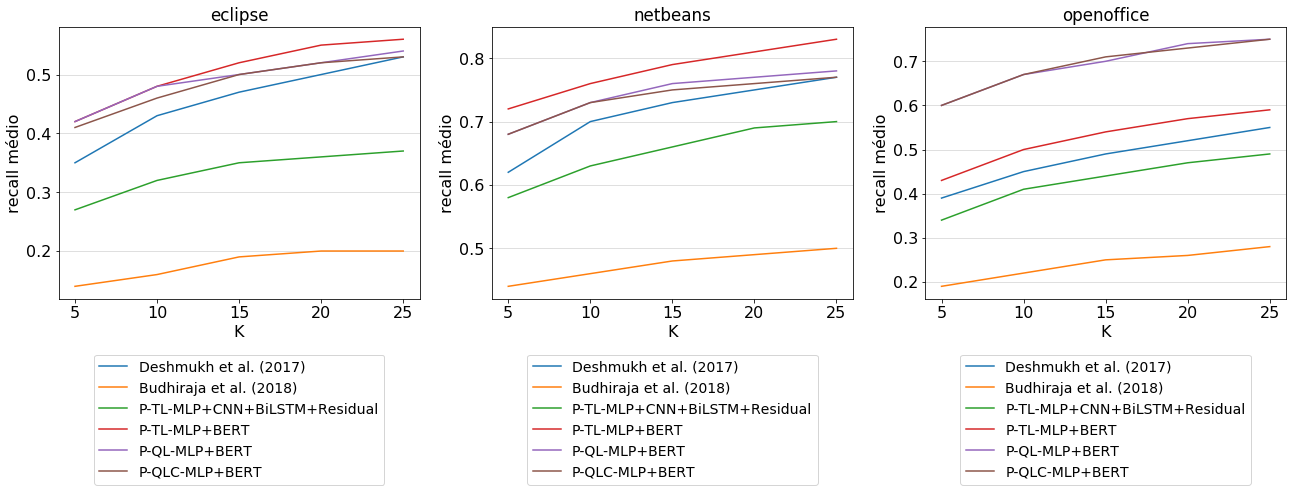

In [5]:
import matplotlib.ticker as mticker

MEDIUM_SIZE = 16
SMALL_SIZE = 14

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels

#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# equivalent but more general
fig, axes = plt.subplots(nrows=1, ncols=len(domains), figsize=(22, 5))

df_100 = df[df['epoch'] == '100']

for index, domain in enumerate(domains):
    aproachs = df_100['method'].unique()
    for method in aproachs:
        experiment = df_100[(df_100['method'] == method) & (df_100['domain'] == domain)]
        if experiment.shape[0] > 0:
            experiment.plot(x='recall@k', y='acc', label=method, ax=axes[index])
    
    axes[index].set_ylabel('recall médio')
    axes[index].set_xlabel('K')
    text = axes[index].set_title('{}'.format(domain))
    lgd = axes[index].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18))
    formatter = mticker.ScalarFormatter()
    axes[index].xaxis.set_major_formatter(formatter)
    axes[index].xaxis.set_major_locator(mticker.FixedLocator([5, 10, 15, 20, 25]))
    axes[index].grid(True, axis='y', alpha=.5)

fig.savefig('retrieval_100.png', bbox_inches="tight")

## 1000 epochs

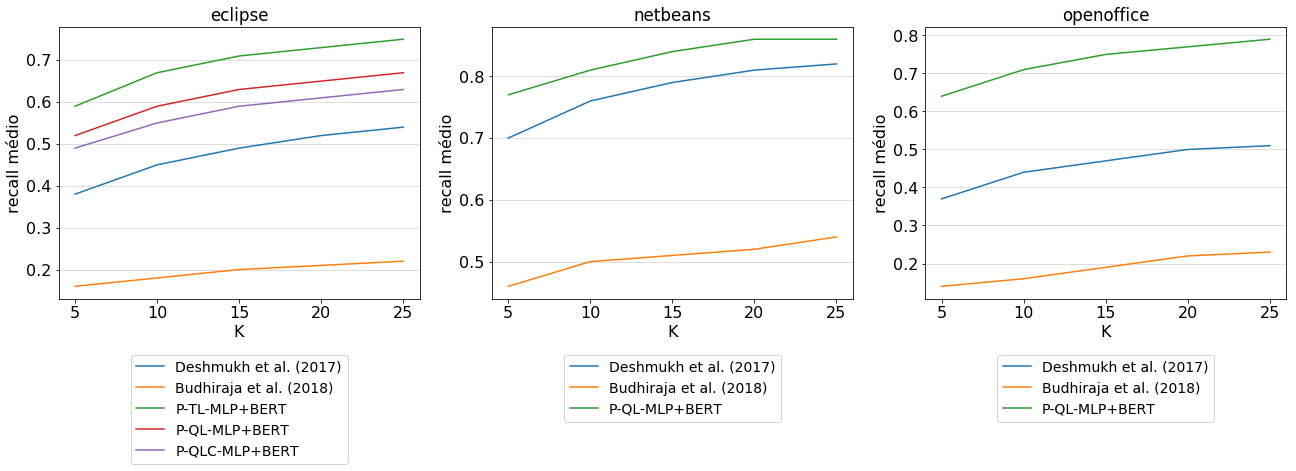

In [6]:
import matplotlib.ticker as mticker

MEDIUM_SIZE = 16
SMALL_SIZE = 14

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels

#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# equivalent but more general
fig, axes = plt.subplots(nrows=1, ncols=len(domains), figsize=(22, 5))

df_1000 = df[df['epoch'] == '1000']

for index, domain in enumerate(domains):
    aproachs = df['method'].unique()
    for method in aproachs:
        experiment = df_1000[(df_1000['method'] == method) & (df_1000['domain'] == domain)]
        if experiment.shape[0] > 0:
            experiment.plot(x='recall@k', y='acc', label=method, ax=axes[index])
    
    axes[index].set_ylabel('recall médio')
    axes[index].set_xlabel('K')
    text = axes[index].set_title('{}'.format(domain))
    lgd = axes[index].legend(loc='upper center', bbox_to_anchor=(0.5, -0.18))
    formatter = mticker.ScalarFormatter()
    axes[index].xaxis.set_major_formatter(formatter)
    axes[index].xaxis.set_major_locator(mticker.FixedLocator([5, 10, 15, 20, 25]))
    axes[index].grid(True, axis='y', alpha=.5)

fig.savefig('retrieval_1000.png', bbox_inches="tight")

### Classification

In [7]:
import _pickle as pickle

rows = []

for epoch in ['100', '1000']:
    for domain in domains:
        # Dataset paths
        DIR = 'data/processed/{}'.format(domain)

        for method in methods[epoch]:
            path = os.path.join(DIR, 'classification_{}.pkl'.format(method))

            try:
                with open(path, 'rb') as f:
                    result = pickle.load(f)

                print(path)

                rows.append({ 'autor': authors[result['method']], 'acurácia' : result['acc_test'], 'roc/auc' : result['roc_test'],  
                             'domain' : domain })
            except:
                print("Does not exist result for: {}".format(path))
                pass
    
df_cls = pd.DataFrame(data=rows, columns=['autor', 'acurácia', 'roc/auc', 'domain'])

Does not exist result for: data/processed/eclipse/classification_baseline_100.pkl
Does not exist result for: data/processed/eclipse/classification_baseline_dwen_100.pkl
Does not exist result for: data/processed/eclipse/classification_propose_100.pkl
Does not exist result for: data/processed/eclipse/classification_propose_softmax_100.pkl
Does not exist result for: data/processed/eclipse/classification_propose_master_triplet_loss_100.pkl
Does not exist result for: data/processed/eclipse/classification_propose_bert_triplet_100.pkl
Does not exist result for: data/processed/eclipse/classification_propose_bert_100.pkl
Does not exist result for: data/processed/eclipse/classification_propose_centroid_bert_100.pkl
Does not exist result for: data/processed/eclipse/classification_doc2vec_100.pkl
Does not exist result for: data/processed/eclipse/classification_fasttext_100.pkl
Does not exist result for: data/processed/netbeans/classification_baseline_100.pkl
Does not exist result for: data/process

In [8]:
df_cls

,autor,acurácia,roc/auc,domain


TypeError: Empty 'DataFrame': no numeric data to plot

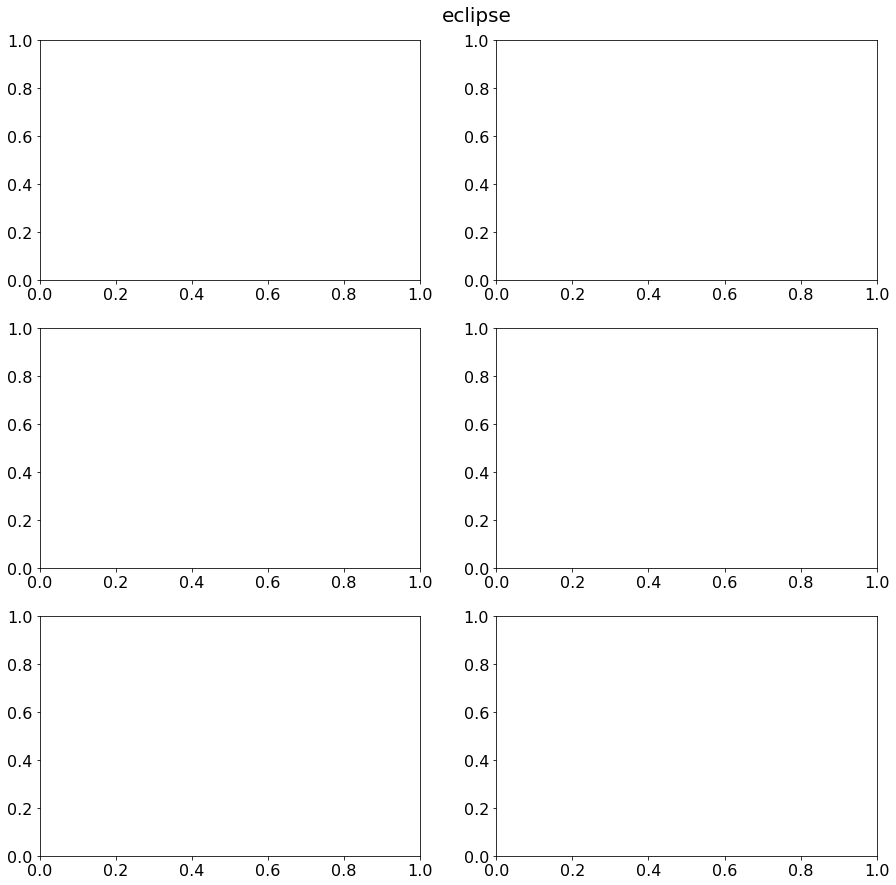

In [9]:
fig, axes = plt.subplots(nrows=len(domains), ncols=2, figsize=(15, 15))

for row, domain in enumerate(domains):
    plt.text(1.15, 1.08, domain,
         horizontalalignment='center',
         fontsize=20,
         transform = axes[row, 0].transAxes)
    ax = df_cls[df_cls['domain'] == domain].set_index('autor')[['acurácia']].plot.barh(ax=axes[row, 0])
    #ax.set_title(domain)
    ax = df_cls[df_cls['domain'] == domain].set_index('autor')[['roc/auc']].plot.barh(ax=axes[row, 1], color='g')
    ax.get_yaxis().set_visible(False)
    #ax.set_title(domain)
    
plt.subplots_adjust(hspace=0.55,
                    wspace=0.35)